In [1]:
import functools
import scipy as sp
import numpy as np
import seaborn
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import pandas as pd
import time
% matplotlib inline
def timeit(method):
    def timed(*args, **kw):
        ts = time.time()
        result = method(*args, **kw)
        te = time.time()
        print('%r  %2.2f ms' % \
                  (method.__name__, (te - ts) * 1000))
        return result
    return timed
import math

In [3]:
def euclidean(p1,p2):
    diff = np.subtract(p1,p2)
    dist = np.linalg.norm(diff)
    return dist
def iso_cov(phi, p1, p2):
    """a function that returns the correlation
    between two oned points"""
    sigma = 1
    dist = euclidean(p1,p2)
    return sigma**2 * np.exp(-dist/phi)
def aniso2d_cov(phi,factor, p1, p2):
    sigma = 1
    dist0 = euclidean(p1[0],p2[0])
    dist1 = euclidean(p1[1],p2[1])
    phi2 = phi*factor
    expon = math.sqrt((dist0/phi)**2 + (dist1/phi2)**2)
    return sigma**2 * np.exp(-expon)
@timeit
def form_cov_matrix(list_of_points, covfun):
    """given a list of points """
    npoints = len(list_of_points)
    mat = np.zeros((npoints, npoints))
    allcombs = itertools.product(enumerate(list_of_points), enumerate(list_of_points))
    for (i, elementi), (j,elementj) in allcombs:
            mat[i,j] = covfun(elementi, elementj)
    return mat
@timeit
def simulate(covmatrix):
    """given a covariance matrix perform the
    cholesky decomposition to find lower triangular L
    such that L*L^H = covmatrix, then multiply L by a 
    vector of zero mean unit variance random normal
    numbers to return a realisation of the random process"""
    n,n = np.shape(covmatrix)
    print(n,n)
    L = np.linalg.cholesky(covmatrix)#nxn triangular matrix
    rands = np.random.normal(size = (n,1))
    sim = np.dot(L , rands)
    return sim

### Test 1D case

In [6]:
vector = range(50)
volatilecov = functools.partial(iso_cov, 0.1)
smoothcov = functools.partial(iso_cov, 20)
volatile_field = simulate(form_cov_matrix(vector, volatilecov))
smooth_field = simulate(form_cov_matrix(vector, smoothcov))

'form_cov_matrix'  59.94 ms
50 50
'simulate'  0.80 ms
'form_cov_matrix'  57.56 ms
50 50
'simulate'  0.36 ms


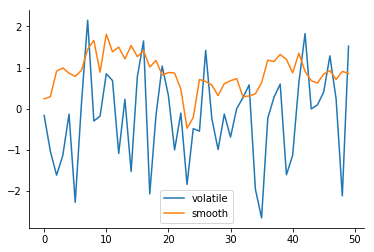

In [7]:
fig, ax = plt.subplots(1)
ax.plot(volatile_field, label = 'volatile')
ax.plot(smooth_field, label = 'smooth')
ax.legend()
sns.despine()

### Now test 2D case

In [14]:
@timeit
def twod_grid(n, size=1):
    """given a size, generate a list of pairs of coordinates
    corresponding with grid points on a sizexsize grid"""
    xs = ys = np.arange(start=0,stop=int(n*size), step=size)
    return list(itertools.product(xs, ys))
def plot(original,twod):
    df = pd.DataFrame(original, columns=['row','col'])
    df['values'] = twod
    mat = df.pivot('row','col', 'values')
    ax = sns.heatmap(mat)
    return ax
square = twod_grid(50)
volatile_2d = simulate(form_cov_matrix(square, volatilecov))
smooth_2d = simulate(form_cov_matrix(square, smoothcov))

    

'twod_grid'  0.32 ms
'form_cov_matrix'  165084.74 ms
2500 2500
'simulate'  36003.18 ms
'form_cov_matrix'  166983.43 ms
2500 2500
'simulate'  1072.66 ms


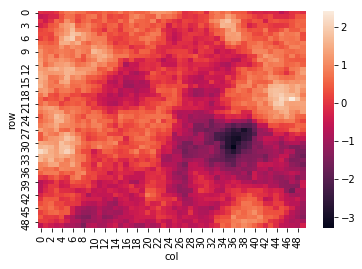

In [15]:
ax1 = plot(square, smooth_2d)

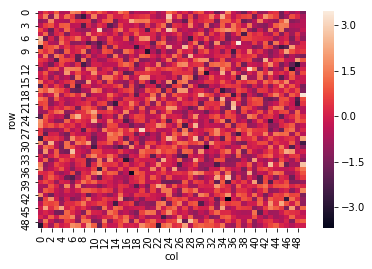

In [16]:
ax2 = plot(square, volatile_2d)

### Simple 2D anisotropy

In [104]:
scov = functools.partial(aniso2d_cov, 0.1, 50)
vcov = functools.partial(aniso2d_cov, 5, 50)
volatile_aniso2d = simulate(form_cov_matrix(square, scov))
smooth_aniso2d = simulate(form_cov_matrix(square, vcov))

'form_cov_matrix'  6577.34 ms
400 400
'simulate'  6.86 ms
'form_cov_matrix'  6643.48 ms
400 400
'simulate'  6.64 ms


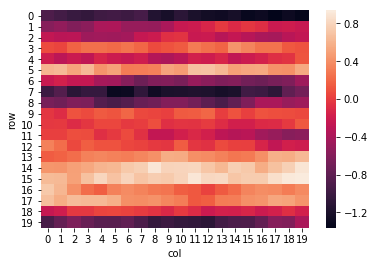

In [105]:
plot(square, smooth_aniso2d)

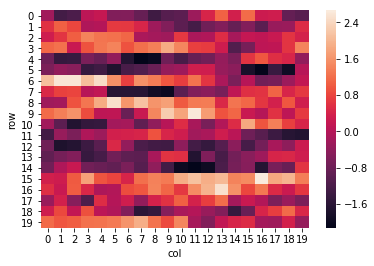

In [106]:
plot(square, volatile_aniso2d)

In [19]:
24*365*10*10

876000